In [1]:
#Phase 1: Setup 
#Import time series libraries (pandas, statsmodels, sklearn) 
#Load and parse date-indexed data 
#1.LOADING OF THE DATASET(This dataset contains monthly airline passenger numbers from 1949 to 1960.)(LINEAR REGRESSION)
import pandas as pd
air=pd.read_csv("C:/Users/marad/Downloads/AirPassengers.csv")
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [2]:
      #DataSet information
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
print(air.columns)

Index(['Month', '#Passengers'], dtype='object')


In [3]:
print(air.dtypes)

Month          object
#Passengers     int64
dtype: object


In [4]:
#2.Data Cleaning
#Handling the missing values(for this no missing values)
air.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
        #Finding of out Layers(Outliers are values that are much higher or lower than the rest of the data)
        #Improve model accuracy	
        #clear visualizations
        #understanding unusual events(IQR METHOD)
Q1 = air['#Passengers'].quantile(0.25)
Q3 = air['#Passengers'].quantile(0.75)
IQR = Q3 - Q1                                                              
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = air[(air['#Passengers'] < lower_bound) | (air['#Passengers'] > upper_bound)]
print(outliers)  # there are no out layers to my dataset = There were no rows in your dataset that matched the outlier condition.
                  #So: None of the values were too high or too low.

Empty DataFrame
Columns: [Month, #Passengers]
Index: []


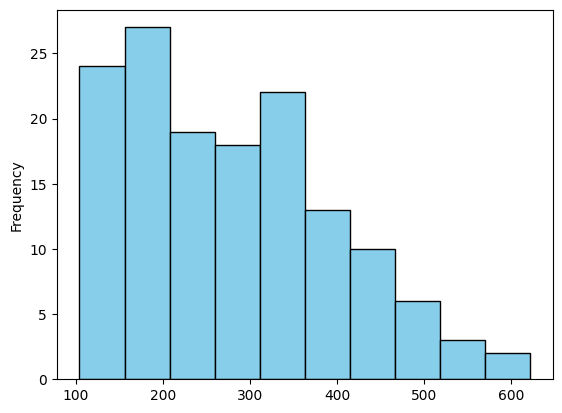

In [14]:
#3.DATA VISUALIZATION(HISTOGRAM)
import matplotlib.pyplot as plt
plt.hist(air['#Passengers'], bins=10, color='skyblue', edgecolor='black')
plt.show()

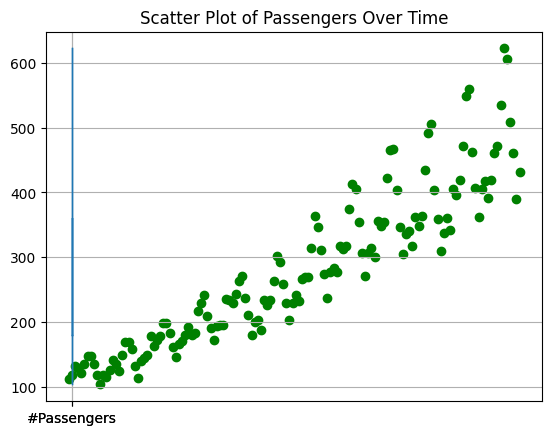

In [21]:
#SCATTER PLOT
plt.scatter(air['Month'], air['#Passengers'], color='green')
plt.title("Scatter Plot of Passengers Over Time")
plt.show()

In [32]:
#4.DATA ENCODING(Encoding means converting text (categorical data) into numbers, so that machine learning models can understand and use them)
# Step 0: Convert 'Month' to datetime format
air['Month'] = pd.to_datetime(air['Month'])

# Step 1: Extract MonthName like Jan, Feb, etc.
air['MonthName'] = air['Month'].dt.strftime('%b')

# Step 2: Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
air['MonthEncoded'] = le.fit_transform(air['MonthName'])

# Step 3: Show output
print(air[['Month', 'MonthName', 'MonthEncoded']].head(12))

        Month MonthName  MonthEncoded
0  1949-01-01       Jan             4
1  1949-02-01       Feb             3
2  1949-03-01       Mar             7
3  1949-04-01       Apr             0
4  1949-05-01       May             8
5  1949-06-01       Jun             6
6  1949-07-01       Jul             5
7  1949-08-01       Aug             1
8  1949-09-01       Sep            11
9  1949-10-01       Oct            10
10 1949-11-01       Nov             9
11 1949-12-01       Dec             2


In [35]:
#5.DATA SPLITTING(When we build a machine learning model, we split the data into two parts:Y=TRAINING DATA,TEASTING DATA)(
#(80% Train / 20% Test)

# Step 1: Define features (X) and target (y)
X = air[['MonthEncoded']]  # You can add more features later
y = air['#Passengers']

# Step 2: Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Print shapes
print("Train size:", len(X_train))
print("Test size :", len(X_test))

Train size: 115
Test size : 29


In [40]:
#6.MODEL TRAINING AND MODL PREDICTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values:", y_pred[:5])

Predicted values: [245.29344611 233.28668239 234.48735876 235.68803513 244.09276973]


In [41]:
#7.MODEL EVALUATION
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", round(rmse, 2))
print("MAE :", round(mae, 2))
print("R² Score:", round(r2, 2))

RMSE: 215.06
MAE : 200.65
R² Score: -6.58


In [2]:
#Phase 2: Feature Engineering 
#Add lag and rolling average features 
#Decompose trend/seasonality

In [4]:
import pandas as pd
air=pd.read_csv("C:/Users/marad/Downloads/AirPassengers.csv")
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
# Step 1: Create lag features (previous month values)
air['lag_1'] = air['#Passengers'].shift(1)   # 1 month before
air['lag_2'] = air['#Passengers'].shift(2)   # 2 months before
air['lag_3'] = air['#Passengers'].shift(3)   # 3 months before
air.head(10)

,Month,#Passengers,lag_1,lag_2,lag_3
0,1949-01,112,NaN,NaN,NaN
1,1949-02,118,112.0,NaN,NaN
2,1949-03,132,118.0,112.0,NaN
3,1949-04,129,132.0,118.0,112.0
4,1949-05,121,129.0,132.0,118.0
5,1949-06,135,121.0,129.0,132.0
6,1949-07,148,135.0,121.0,129.0
7,1949-08,148,148.0,135.0,121.0
8,1949-09,136,148.0,148.0,135.0
9,1949-10,119,136.0,148.0,148.0


In [7]:
air.isnull().sum()

Month          0
#Passengers    0
lag_1          1
lag_2          2
lag_3          3
dtype: int64

In [11]:
air.dropna(inplace=True)

In [12]:
print(air.head())

     Month  #Passengers  lag_1  lag_2  lag_3
3  1949-04          129  132.0  118.0  112.0
4  1949-05          121  129.0  132.0  118.0
5  1949-06          135  121.0  129.0  132.0
6  1949-07          148  135.0  121.0  129.0
7  1949-08          148  148.0  135.0  121.0


In [13]:
air.isnull().sum()

Month          0
#Passengers    0
lag_1          0
lag_2          0
lag_3          0
dtype: int64

In [15]:
# Step 2: Create a 3-month rolling average
air['rolling_3'] = air['#Passengers'].rolling(window=3).mean()
print(air[['#Passengers', 'rolling_3']].head(10))

    #Passengers   rolling_3
3           129         NaN
4           121         NaN
5           135  128.333333
6           148  134.666667
7           148  143.666667
8           136  144.000000
9           119  134.333333
10          104  119.666667
11          118  113.666667
12          115  112.333333


In [16]:
# Step 3: Drop rows with NaN (from shifting and rolling)
air.dropna(inplace=True)

In [17]:
# Step 4: View the new dataset with features
print(air.head())

     Month  #Passengers  lag_1  lag_2  lag_3   rolling_3
5  1949-06          135  121.0  129.0  132.0  128.333333
6  1949-07          148  135.0  121.0  129.0  134.666667
7  1949-08          148  148.0  135.0  121.0  143.666667
8  1949-09          136  148.0  148.0  135.0  144.000000
9  1949-10          119  136.0  148.0  148.0  134.333333


In [19]:
# Independent variables (features)
X = air[['lag_1', 'lag_2', 'lag_3', 'rolling_3']]
# Dependent variable (target)
y = air['#Passengers']
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   lag_1  lag_2  lag_3   rolling_3
5  121.0  129.0  132.0  128.333333
6  135.0  121.0  129.0  134.666667
7  148.0  135.0  121.0  143.666667
8  148.0  148.0  135.0  144.000000
9  136.0  148.0  148.0  134.333333

Target (y):
5    135
6    148
7    148
8    136
9    119
Name: #Passengers, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

# Split data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check sizes
print("Train size:", len(X_train))
print("Test size :", len(X_test))

Train size: 111
Test size : 28


In [21]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [22]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-1.00000000e+00 -1.00000000e+00 -1.33889455e-14  3.00000000e+00]
Model Intercept: -2.842170943040401e-14


In [23]:
# Predict on the test set
y_pred = model.predict(X_test)

# Show first 5 predicted values
print("Predicted values:", y_pred[:5])

Predicted values: [404. 359. 310. 337. 360.]


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))
print("R² Score:", round(r2, 2))

Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
R² Score: 1.0
